In [6]:
import numpy as np
import matplotlib.pyplot as plt
import cmath
from scipy.integrate import odeint
from scipy.signal import find_peaks

In [2]:
def f(x,t,g,h):
  dx_dt = np.zeros(200)
  dx1 = np.zeros(100)
  dx2 = np.zeros(100)
  x1 = x[0:100]
  x2 = x[100:200]
  dx1 = x2
  dx2 = -np.sin(x1) + g*(np.roll(x1,1) + np.roll(x1,-1)-2*x1) + h*(np.average(x1)*np.ones(100)-x1)
  dx_dt = np.hstack([dx1,dx2])
  return dx_dt

def findLocalization(entotal, energy):
    
  threshold = 0.1 * entotal  # Define the energy threshold for localization

  for n in range(energy.shape[0]):  # Iterate over time steps
    data = energy[n, :]          # Extract energy distribution at time step n
    max_energy = np.max(data)    # Find the maximum energy at this time step

    if max_energy > threshold:   # Check if the threshold is exceeded
      localization_time = n    # Record the time step
      localization_site = np.argmax(data)  # Find the pendulum with the highest energy
      return localization_time, localization_site

  # If no localization is found, return None
  return None, None
    
def boxcar(energy,snap, kernel_size = 10):
  etrace = energy[snap,:]
  offset = int(kernel_size/2)
  extrapts = etrace[0:kernel_size]
  etrace2 = np.concatenate((etrace,extrapts))
  kernel = np.ones(kernel_size) / kernel_size
  ebox1 = np.convolve(etrace2, kernel, mode='valid')
  ebox = np.roll(ebox1,offset)
  return ebox

In [3]:
#---- Parameters --------
g = 0.75
tf = 150
dt = 0.5
Nt = int(tf/dt)
#Type I instability: use h = -0.15, A = 1.25
#Type II instability: use h = 0, A = 1.2
#Type III instability: use h = +0.5, A = 1.75
h = 0.5
A = 1.75
#------------------------

#---- Initial conditions ----------------
x0 = A*np.ones(100) + 0.05*(np.random.rand(100)-0.5)
v0 = np.zeros(100)
x_0 = np.hstack([x0,v0])
t = np.arange(0,tf,dt)
#---------------------------------------

x = odeint(f, x_0, t, args=(g,h,))
theta = x[:,0:100]
dtheta = x[:,100:200]
energy =  dtheta**2 - 2*np.cos(theta) + 2*np.ones((Nt,100)) + g*(theta-np.roll(theta,-1, axis=1))**2 + h*(theta-np.average(theta,axis=1).reshape(Nt,1))**2
entotal = np.sum(energy,axis=1)

In [4]:
np.random.normal()

0.23535763304346446

73

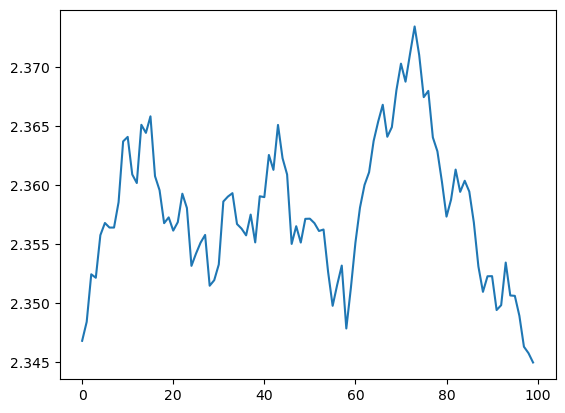

In [5]:
energy2 = [2.34678734, 2.34839844, 2.35243329, 2.35213993, 2.35575356,
       2.35678753, 2.35639971, 2.35639971, 2.35855417, 2.36371344,
       2.36409539, 2.36090722, 2.36017892, 2.36512059, 2.36443682,
       2.36584126, 2.36076063, 2.35956567, 2.35677194, 2.35726336,
       2.3561409 , 2.35685729, 2.35927344, 2.35806135, 2.35314925,
       2.35419119, 2.35511448, 2.35577445, 2.3514629 , 2.35193296,
       2.35326538, 2.35861025, 2.35902706, 2.35931979, 2.35670096,
       2.35630775, 2.3557388 , 2.35750138, 2.35514077, 2.35905493,
       2.35898205, 2.36256178, 2.36129649, 2.36510985, 2.36228821,
       2.3609035 , 2.35501234, 2.35651415, 2.35512698, 2.35713899,
       2.35715249, 2.3567749 , 2.35610866, 2.35623445, 2.35264184,
       2.34975644, 2.35154653, 2.35317153, 2.34783367, 2.35126751,
       2.35511749, 2.3580916 , 2.36001509, 2.36109452, 2.36375056,
       2.3653985 , 2.36682171, 2.36410579, 2.36492146, 2.36805363,
       2.37031187, 2.3687807 , 2.37116146, 2.37346591, 2.3710417 ,
       2.36746813, 2.36799808, 2.36405118, 2.36287061, 2.36026788,
       2.35732826, 2.35877624, 2.36132186, 2.3594304 , 2.36037156,
       2.3594539 , 2.35683092, 2.35310178, 2.3509436 , 2.35226573,
       2.35227561, 2.3493989 , 2.34981232, 2.35342863, 2.35063684,
       2.35060301, 2.34890784, 2.34628569, 2.34574021, 2.34494898]

plt.plot(energy2)
with open("energySmooth.txt", "w") as text_file:
    text_file.write(str("Smoothed Energy Data (Time = 0):" + str(energy2)))
np.argmax(energy2)

30

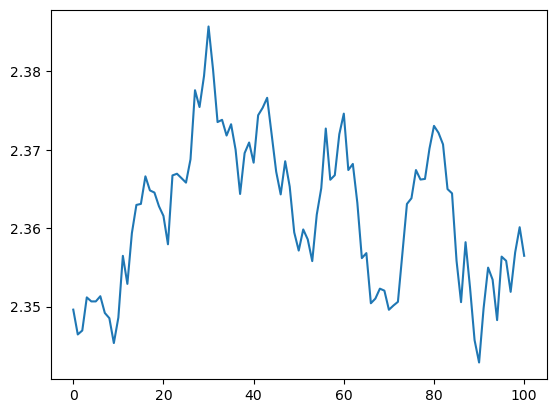

In [6]:
plt.plot(boxcar(energy,0))
with open("energySmooth.txt", "w") as text_file:
    text_file.write(str("Smoothed Energy Data (Time = 0):" + str(boxcar(energy,0))))
np.argmax(boxcar(energy,0))

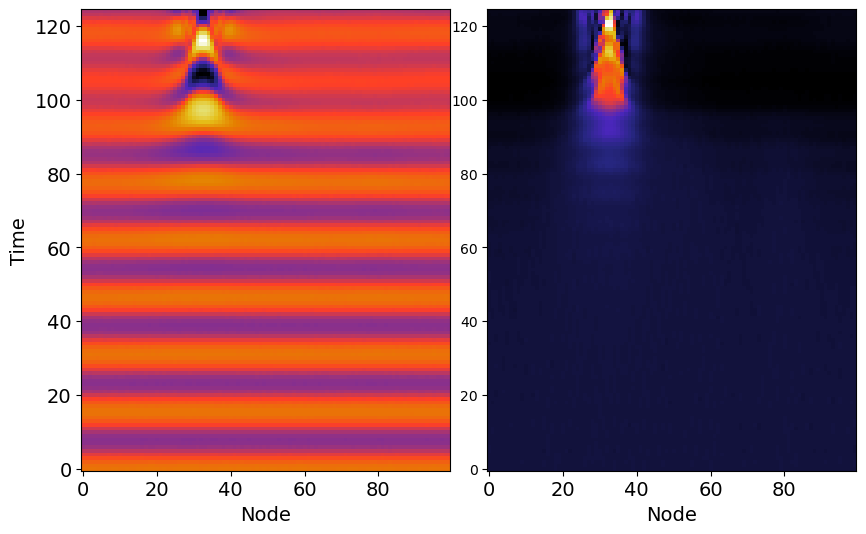

In [7]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1);
plt.imshow(theta[0:125,:], origin='lower', cmap='CMRmap')
plt.xlabel("Node",fontsize = 14)
plt.ylabel("Time",fontsize = 14)
plt.yticks(np.arange(0,121,20),fontsize = 14)
plt.tick_params(axis='y', colors='black')
plt.xticks(fontsize = 14)

plt.subplots_adjust(wspace=0.1)

plt.subplot(1,2,2);
plt.imshow(energy[0:125,:],  origin='lower', cmap='CMRmap')
plt.xlabel("Node",fontsize = 14)
plt.xticks(fontsize = 14)

#plt.savefig('colorMap.pdf', bbox_inches = 'tight')
plt.show()

## Generating the data set

In [ ]:
import numpy as np
import h5py
import concurrent.futures
from scipy.integrate import odeint
import concurrent.futures
from functools import partial

def generate_dataset(num_simulations, tf, dt, g, h, A_range=(1.5, 2.0), noise_level=0.025, 
                     batch_size=10, max_workers=None):
    """
    Generates a dataset of sine-Gordon simulations with random initial conditions,
    using multi-threading and batch processing for improved performance.

    Parameters:
        num_simulations (int): Number of simulations to generate.
        tf (float): Total simulation time.
        dt (float): Time step for numerical integration.
        g (float): Coupling strength parameter.
        h (float): Global interaction strength parameter.
        A_range (tuple): Range of initial angular displacement amplitude (A).
        noise_level (float): Amplitude of random noise added to initial conditions.
        batch_size (int): Number of simulations to process in each batch.
        max_workers (int, optional): Maximum number of worker threads. 
                                    If None, uses default ThreadPoolExecutor value.

    Returns:
        tuple: A tuple containing the time array and a dictionary of simulation data.
    """
    # Initialize an empty dictionary to store all simulation data
    dataset = {}

    # Define the number of pendulums
    N = 100

    # Define the sine-Gordon ODE function
    def f(x, t, g, h):
        dx_dt = np.zeros(2 * N)
        x1 = x[:N]  # Angular positions
        x2 = x[N:]  # Angular velocities
        dx1 = x2
        dx2 = -np.sin(x1) + g * (np.roll(x1, 1) + np.roll(x1, -1) - 2 * x1) + h * (np.average(x1) * np.ones(N) - x1)
        dx_dt = np.hstack([dx1, dx2])
        return dx_dt

    # Define the time array
    t = np.arange(0, tf, dt)

    # Store the time array in the dataset
    dataset['time_steps'] = t
    
    # Function to run a single simulation
    def run_simulation(sim_idx, g, h, noise_level, A_range, t):
        # Generate random initial conditions
        A = float(np.random.uniform(A_range[0], A_range[1]))  # Random amplitude within the specified range
        x0 = A * np.ones(N) + noise_level * (np.random.rand(N) - 0.5)  # Initial positions with noise
        v0 = np.zeros(N)  # Initial velocities
        x_0 = np.hstack([x0, v0])  # Combine positions and velocities into a single state vector

        # Solve the ODE
        x = odeint(f, x_0, t, args=(g, h))

        # Extract theta (positions) and dtheta (velocities)
        theta = x[:, :N]
        dtheta = x[:, N:]

        # Compute energy at each time step
        energy = (
            0.5 * dtheta**2  # Kinetic energy
            + (1 - np.cos(theta))  # Potential energy
            + g * (theta - np.roll(theta, -1, axis=1))**2  # Coupling energy
            + h * (theta - np.average(theta, axis=1).reshape(-1, 1))**2  # Global interaction energy
        )

        # Return the results for this simulation
        return sim_idx, {
            "initial_conditions": {
                "A": A,
                "noise_level": noise_level,
                "g": g,
                "h": h,
            },
            "theta": theta,
            "dtheta": dtheta,
            "energy": energy,
        }

    # Create a partial function with fixed parameters
    sim_func = partial(run_simulation, g=g, h=h, noise_level=noise_level, A_range=A_range, t=t)
    
    # Process simulations in batches to control memory usage
    for batch_start in range(0, num_simulations, batch_size):
        batch_end = min(batch_start + batch_size, num_simulations)
        batch_indices = range(batch_start, batch_end)
        
        # Use ThreadPoolExecutor for parallel execution
        with concurrent.futures.ThreadPoolExecutor(max_workers=max_workers) as executor:
            # Submit all tasks in this batch
            future_to_idx = {executor.submit(sim_func, idx): idx for idx in batch_indices}
            
            # Process results as they complete
            for future in concurrent.futures.as_completed(future_to_idx):
                sim_idx, sim_data = future.result()
                sim_key = f"simulation_{sim_idx}"
                dataset[sim_key] = sim_data

    return dataset

def save_dataset_to_h5(dataset, filename):
    """
    Saves the dataset to an HDF5 file.

    Parameters:
        dataset (dict): The dataset generated by `generate_dataset`.
        filename (str): The name of the HDF5 file to save the dataset.
    """
    with h5py.File(filename, 'w') as hf:
        # Save global time steps
        hf.create_dataset("time_steps", data=dataset.pop("time_steps"))

        # Save each simulation group
        for sim_key, sim_data in dataset.items():
            sim_group = hf.create_group(sim_key)
            
            # Save initial conditions
            ic_group = sim_group.create_group("initial_conditions")
            for key, value in sim_data["initial_conditions"].items():
                ic_group.attrs[key] = value
            
            # Save numerical arrays
            sim_group.create_dataset("theta", data=sim_data["theta"])
            sim_group.create_dataset("dtheta", data=sim_data["dtheta"])
            sim_group.create_dataset("energy", data=sim_data["energy"])


In [2]:

dataset = generate_dataset(
    num_simulations=100000,
    tf=100.0,
    dt=0.5,
    g=0.75,
    h=0.5,
    A_range=(1.65, 1.85),
    noise_level=0.025
)
    
# Save the dataset to an HDF5 file
save_dataset_to_h5(dataset, "sine_gordon_dataset.h5")

Verifying the number of simulations

In [3]:
import h5py

# Open the HDF5 file in read mode
filename = "sine_gordon_dataset.h5"
with h5py.File(filename, 'r') as hf:
    # List all keys in the file
    all_keys = list(hf.keys())
    
    # Filter keys to find simulation groups
    simulation_keys = [key for key in all_keys if key.startswith("simulation_")]
    
    # Count the number of simulations
    num_simulations = len(simulation_keys)
    
    print(f"Number of simulations in the file: {num_simulations}")

Number of simulations in the file: 100000


## Adding the target variable (the time and node where localization occured in each simulation)

In [2]:
import h5py
import numpy as np

def find_localization_location(energy_data, threshold):
    """
    Finds the first instance of energy localization in a simulation.

    Parameters:
        energy_data (np.ndarray): Energy values for all pendulums over time.
        threshold (float): Energy threshold for localization.

    Returns:
        int: The index of the pendulum where localization occurs.
        float: The timestamp when localization occurs.
    """
    # Iterate over time steps to find the first instance of localization
    for t_idx, energy_at_t in enumerate(energy_data):
        # Find the pendulum with energy exceeding the threshold
        max_energy = np.max(energy_at_t)
        if max_energy > threshold:
            localized_pendulum = np.argmax(energy_at_t)  # Index of the pendulum
            return localized_pendulum, t_idx  # Return pendulum index and time step
    
    # If no localization is found, return None
    return None, None


def add_localization_targets_to_h5(filename, threshold_fraction=0.1):
    """
    Iterates over simulations in the HDF5 file, finds the localization location,
    and stores it as a target variable in the file.
    """
    with h5py.File(filename, 'r+') as hf:
        # Get the total number of pendulums (N) from the first simulation's theta shape
        sim_key = next(key for key in hf.keys() if key.startswith("simulation_"))
        N = hf[f"{sim_key}/theta"].shape[1]
        
        # Iterate over each simulation group
        for sim_key in hf.keys():
            if sim_key.startswith("simulation_"):
                sim_group = hf[sim_key]
                
                # Load energy data for the simulation
                energy_data = sim_group['energy'][:]
                
                # Calculate the threshold energy (10% of total energy)
                total_energy = np.sum(energy_data[0])  # Total energy is conserved
                threshold = threshold_fraction * total_energy
                
                # Find the localization location and time
                localized_pendulum, localization_time = find_localization_location(energy_data, threshold)
                
                # Store the results as attributes in the simulation group
                # Use -1 as a placeholder for None (no localization found)
                sim_group.attrs['localized_pendulum'] = int(localized_pendulum) if localized_pendulum is not None else -1
                sim_group.attrs['localization_time'] = int(localization_time) if localization_time is not None else -1
                
                # Print outcome
                if localized_pendulum is not None:
                    print(f"Simulation {sim_key}: Localization at pendulum {localized_pendulum} at time step {localization_time}")
                else:
                    print(f"Simulation {sim_key}: No localization detected")

In [ ]:
# Add localization targets to the HDF5 file
add_localization_targets_to_h5("sine_gordon_dataset.h5", threshold_fraction=0.1)

Simulation simulation_0: Localization at pendulum 97 at time step 89
Simulation simulation_1: Localization at pendulum 74 at time step 59
Simulation simulation_10: Localization at pendulum 5 at time step 81
Simulation simulation_100: Localization at pendulum 13 at time step 53
Simulation simulation_1000: Localization at pendulum 79 at time step 49
Simulation simulation_1001: Localization at pendulum 81 at time step 63
Simulation simulation_1002: Localization at pendulum 95 at time step 50
Simulation simulation_1003: Localization at pendulum 68 at time step 45
Simulation simulation_1004: Localization at pendulum 85 at time step 49
Simulation simulation_1005: Localization at pendulum 98 at time step 63
Simulation simulation_1006: Localization at pendulum 96 at time step 49
Simulation simulation_1007: Localization at pendulum 61 at time step 74
Simulation simulation_1008: Localization at pendulum 13 at time step 53
Simulation simulation_1009: Localization at pendulum 67 at time step 50
Si

In [2]:
def analyze_localization_distribution(filename):
    """
    Analyzes the distribution of localization nodes across all simulations in the HDF5 file.
    """
    # Initialize a dictionary to store the frequency of each node being a localization site
    localization_counts = {}
    no_localization_count = 0
    total_sims = 0
    
    # Open the HDF5 file in read mode
    with h5py.File(filename, 'r') as hf:
        # First, count the total simulations
        total_sims = len([k for k in hf.keys() if k.startswith("simulation_")])
        
        # Iterate over each simulation group
        for sim_key in hf.keys():
            if sim_key.startswith("simulation_"):
                sim_group = hf[sim_key]
                
                # Check if the localization information exists
                if 'localized_pendulum' in sim_group.attrs:
                    localized_pendulum = sim_group.attrs['localized_pendulum']
                    
                    # Handle the -1 case (no localization)
                    if localized_pendulum == -1:
                        no_localization_count += 1
                    else:
                        # Increment the count for this node
                        if localized_pendulum in localization_counts:
                            localization_counts[localized_pendulum] += 1
                        else:
                            localization_counts[localized_pendulum] = 1
    
    # Print summary statistics (outside the file context)
    print(f"Total simulations: {total_sims}")
    print(f"Simulations with localization: {total_sims - no_localization_count}")
    print(f"Simulations without localization: {no_localization_count}")
    
    # Convert the dictionary to a sorted list of tuples for visualization
    sorted_counts = sorted(localization_counts.items(), key=lambda x: x[0])

    # Extract node indices and their counts
    nodes = [item[0] for item in sorted_counts]
    counts = [item[1] for item in sorted_counts]

    # Plot the distribution
    plt.figure(figsize=(10, 6))
    plt.bar(nodes, counts, color='skyblue', edgecolor='black')
    plt.xlabel('Node Index')
    plt.ylabel('Frequency')
    plt.title('Distribution of Localization Nodes')
    if nodes:  # Check if list is not empty
        plt.xticks(range(0, max(nodes) + 1, 10))  # Adjust x-ticks for clarity
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

Total simulations: 100000
Simulations with localization: 99881
Simulations without localization: 119


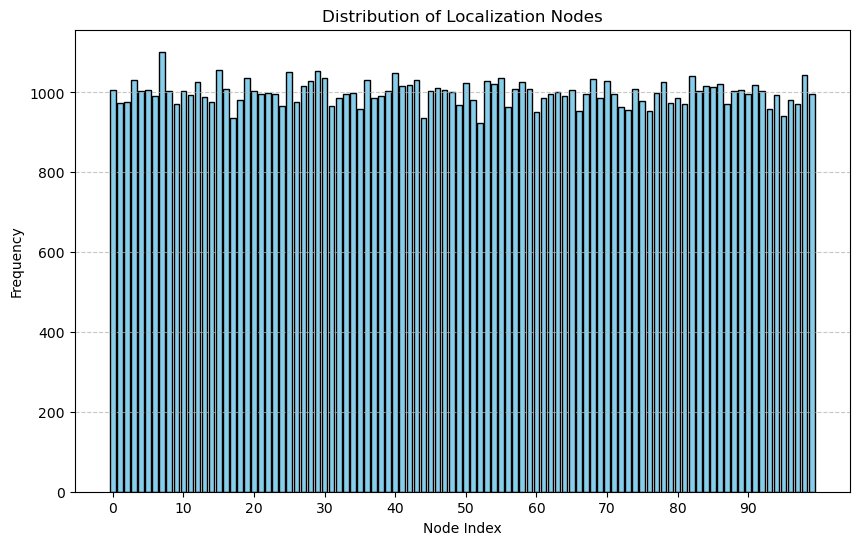

In [7]:
filename = "sine_gordon_dataset_100k.h5"
analyze_localization_distribution(filename)

## Data Preparation

### Neural Network Inplementation for Sine-Gordon Localization Prediction

### *1. Data Prepration*
#### *Step1: Load and Organize Data*
- **data**: The energy profiles with shape 
  <span style="background-color: #333; color: white; padding: 2px;">(num_simulations, num_time_steps,</span>
  <span style="background-color: #333; color: white; padding: 2px;">num_pendulums)</span>.
- **target_localization**: Binary target indicating whether localization occurred.
- **target_location**: Index of the localized pendulum.


In [18]:
import h5py
import numpy as np

def prepare_dataset(filename):
    data = []  # Input features (4D tensor)
    site_targets = []  # Localization site targets
    time_targets = []  # Localization time targets
    
    with h5py.File(filename, 'r') as hf:
        for sim_key in hf.keys():
            if sim_key.startswith("simulation_"):
                sim_group = hf[sim_key]
                
                # Extract energy profile for the first 10 time steps (t=0 to t=9)
                energy_profile = sim_group['energy'][0:10]  # Shape: (10, 100)
                
                # Extract angle profile for the first time step (t=0)
                angle_profile = sim_group['theta'][0]       # Shape: (100,)
                
                # Repeat the angle profile across all 10 time steps to match the energy profile's temporal dimension
                angle_profile_repeated = np.tile(angle_profile, (10, 1))  # Shape: (10, 100)
                
                # Combine energy and angle into a single input tensor
                combined_input = np.stack([energy_profile, angle_profile_repeated], axis=-1)  # Shape: (10, 100, 2)
                
                # Append the combined input to the data list
                data.append(combined_input)
                
                # Extract localization targets
                localized_pendulum = sim_group.attrs.get('localized_pendulum')
                localization_time = sim_group.attrs.get('localization_time')
                
                if localized_pendulum is not None:
                    site_targets.append(localized_pendulum)
                    time_targets.append(localization_time)
    
    # Convert lists to arrays
    data = np.array(data)  # Shape: (num_simulations, 10, 100, 2)
    site_targets = np.array(site_targets)  # Shape: (num_simulations,)
    time_targets = np.array(time_targets)  # Shape: (num_simulations,)
    
    return data, site_targets, time_targets

# Load and prepare the dataset
X, y_site, y_time = prepare_dataset("sine_gordon_dataset.h5")

# Debugging: Print shapes of the dataset
print("Input Data (X):", X.shape)       # Shape: (num_simulations, 10, 100, 2)
print("Site Targets (y_site):", y_site.shape)  # Shape: (num_simulations,)
print("Time Targets (y_time):", y_time.shape)  # Shape: (num_simulations,)

Input Data (X): (10000, 10, 100, 2)
Site Targets (y_site): (10000,)
Time Targets (y_time): (10000,)


### *Step 2. Normalize the Data*
#### Normalize the energy values to have zero mean and unit variance.

In [19]:
from sklearn.preprocessing import StandardScaler

def normalize_data(data):
    """
    Normalizes the input data using StandardScaler.
    Reshapes the data to 2D for scaling, then reshapes back to the original shape.
    """
    num_simulations, num_time_steps, num_pendulums, num_features = data.shape
    
    # Flatten the data for normalization
    data_flat = data.reshape(-1, num_features)  # Shape: (num_simulations * num_time_steps * num_pendulums, num_features)
    
    # Fit scaler and transform data
    scaler = StandardScaler()
    data_flat_normalized = scaler.fit_transform(data_flat)
    
    # Reshape back to original shape
    data_normalized = data_flat_normalized.reshape(data.shape)  # Shape: (num_simulations, num_time_steps, num_pendulums, num_features)
    
    return data_normalized

# Normalize the dataset
X_normalized = normalize_data(X)

# Debugging: Print shapes of normalized data
print("Normalized Input Data Shape:", X_normalized.shape)  # Shape: (num_simulations, 10, 100, 2)

Normalized Input Data Shape: (10000, 10, 100, 2)


### *Step 2. Split the Data*
#### Split the data into training and testing sets.

In [20]:
from sklearn.model_selection import train_test_split

# Define binary and multi-class targets
targets_localization = (y_site != -1).astype(int)  # Binary targets (1 if localization occurs, 0 otherwise)
targets_location = y_site                         # Multi-class targets (pendulum index or -1 if no localization)

# First split (80% training, 20% testing)
X_train_full, X_test, y_bin_train_full, y_bin_test, y_loc_train_full, y_loc_test = train_test_split(
    X_normalized, targets_localization, targets_location,
    test_size=0.2, random_state=42, stratify=targets_localization
)

# Second split (75% training, 25% validation from the training set)
X_train, X_val, y_bin_train, y_bin_val, y_loc_train, y_loc_val = train_test_split(
    X_train_full, y_bin_train_full, y_loc_train_full,
    test_size=0.25, random_state=42, stratify=y_bin_train_full
)

# Debugging: Print shapes of datasets
print("Dataset Shapes After Splitting:")
print("X_train:", X_train.shape)          # Shape: (num_train_samples, 10, 100, 2)
print("X_val:", X_val.shape)              # Shape: (num_val_samples, 10, 100, 2)
print("X_test:", X_test.shape)            # Shape: (num_test_samples, 10, 100, 2)
print("y_bin_train:", y_bin_train.shape)  # Shape: (num_train_samples,)
print("y_bin_val:", y_bin_val.shape)      # Shape: (num_val_samples,)
print("y_bin_test:", y_bin_test.shape)    # Shape: (num_test_samples,)
print("y_loc_train:", y_loc_train.shape)  # Shape: (num_train_samples,)
print("y_loc_val:", y_loc_val.shape)      # Shape: (num_val_samples,)
print("y_loc_test:", y_loc_test.shape)    # Shape: (num_test_samples,)

Dataset Shapes After Splitting:
X_train: (6000, 10, 100, 2)
X_val: (2000, 10, 100, 2)
X_test: (2000, 10, 100, 2)
y_bin_train: (6000,)
y_bin_val: (2000,)
y_bin_test: (2000,)
y_loc_train: (6000,)
y_loc_val: (2000,)
y_loc_test: (2000,)


### *2. Model Design*
##### We'll use a hypbrid CNN-RNN architecture to capture both spatial and temporal dependencies in the data.

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, LSTM, Dense, Flatten, TimeDistributed
import tensorflow as tf

# Input shape: (num_time_steps, num_pendulums, num_features)
input_layer = Input(shape=(10, 100, 2))  # Shape: (10, 100, 2)

# Shared feature extraction
x = TimeDistributed(Conv1D(filters=32, kernel_size=3, activation='relu', padding='same'))(input_layer)
x = TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'))(x)
x = TimeDistributed(Conv1D(filters=128, kernel_size=3, activation='relu', padding='same'))(x)
#x = TimeDistributed(Conv1D(filters=256, kernel_size=3, activation='relu', padding='same'))(x)
x = TimeDistributed(Flatten())(x)  # Flatten spatial dimensions
#x = Bidirectional(LSTM(128, return_sequences=False, dropout=0.2, recurrent_dropout=0.2))(x) THIS REPLACES LINE BELOW
x = LSTM(128, return_sequences=False)(x)  # Capture temporal dependencies
x = Dense(64, activation='relu')(x)

# Binary classification head (localization occurrence)
output_localization = Dense(1, activation='sigmoid', name='localization')(x)

# Multi-class classification head (localization site)
output_location = Dense(100, activation='softmax', name='location')(x)

# Build the model
model = Model(inputs=input_layer, outputs=[output_localization, output_location])



In [22]:
import tensorflow as tf

def custom_location_accuracy(y_true, y_pred):
    """
    Custom accuracy metric that considers predictions within ±4 indices as correct.
    Ignores samples where y_true == -1 (no localization).
    """
    # Convert y_true to integer type
    y_true = tf.cast(y_true, tf.int32)
    
    # Get the predicted class (pendulum index) from y_pred
    y_pred_class = tf.argmax(y_pred, axis=-1, output_type=tf.int32)
    
    # Create a mask to ignore samples where y_true == -1
    mask = tf.not_equal(y_true, -1)
    
    # Apply the mask to filter out invalid samples
    y_true_masked = tf.boolean_mask(y_true, mask)
    y_pred_masked = tf.boolean_mask(y_pred_class, mask)
    
    # Compute absolute deviation between true and predicted locations
    deviation = tf.abs(y_true_masked - y_pred_masked)
    
    # Count predictions as correct if deviation <= 4
    correct_predictions = tf.cast(deviation <= 4, tf.float32)
    
    # Compute mean accuracy
    accuracy = tf.reduce_mean(correct_predictions)
    return accuracy

In [23]:
import tensorflow as tf

def masked_sparse_categorical_crossentropy(y_true, y_pred):
    """
    Custom sparse categorical crossentropy loss that ignores samples where y_true == -1.
    """
    # Create a mask to ignore samples where y_true == -1
    mask = tf.not_equal(y_true, -1)
    
    # Apply the mask to filter out invalid samples
    y_true_masked = tf.boolean_mask(y_true, mask)
    y_pred_masked = tf.boolean_mask(y_pred, mask)
    
    # Compute sparse categorical crossentropy on the masked data
    return tf.keras.losses.sparse_categorical_crossentropy(y_true_masked, y_pred_masked)

model.compile(
    optimizer='adam',
    loss={
        'localization': 'binary_crossentropy',  # Binary classification loss
        'location': masked_sparse_categorical_crossentropy  # Masked multi-class classification loss
    },
    loss_weights={
        'localization': 0.5,  # Lower weight for binary classification
        'location': 1.0       # Higher weight for multi-class classification
    },
    metrics={
        'localization': 'accuracy',  # Binary classification accuracy
        'location': custom_location_accuracy  # Custom accuracy for multi-class classification
    }
)

# Debugging: Print model summary
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 10, 100,   │          0 │ -                 │
│ (InputLayer)        │ 2)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ time_distributed_7  │ (None, 10, 100,   │        224 │ input_layer_2[0]… │
│ (TimeDistributed)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ time_distributed_8  │ (None, 10, 100,   │      6,208 │ time_distributed… │
│ (TimeDistributed)   │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ time_distributed_9  │ (None, 10, 100,   │     24,704 │ time_distributed… │
│ (TimeDistributed)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ time_distributed_10 │ (None, 10, 12800) │          0 │ time_distributed… │
│ (TimeDistributed)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_2 (LSTM)       │ (None, 128)       │  6,619,648 │ time_distributed… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 64)        │      8,256 │ lstm_2[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ localization        │ (None, 1)         │         65 │ dense_2[0][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ location (Dense)    │ (None, 100)       │      6,500 │ dense_2[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 6,665,605 (25.43 MB)

 Trainable params: 6,665,605 (25.43 MB)

 Non-trainable params: 0 (0.00 B)

### *2. Training Strategy*
#### *Step 1: Early Stopping*
##### We use early stopping to prevent overfitting and determiine the optimal number of epochs.

In [24]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=10,         # Stop if no improvement for 20 epochs
    restore_best_weights=True  # Restore weights from the best epoch
)

#### *Step 2: Train the Model*
##### We train the model using the training and validation sets.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
# Train the model
history = model.fit(
    X_train,
    {
        'localization': y_bin_train,  # Binary classification targets
        'location': y_loc_train       # Multi-class classification targets
    },
    batch_size=64,
    epochs=100,  # Large number of epochs; early stopping will stop training
    validation_data=(
        X_val,
        {
            'localization': y_bin_val,  # Binary classification targets for validation
            'location': y_loc_val       # Multi-class classification targets for validation
        }
    ),
    callbacks=[early_stopping]
)

# Debugging: Print training history keys
print("Training History Keys:", history.history.keys())

#model.save('sine_gordon_model.h5')

Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 33s 324ms/step - localization_accuracy: 0.9671 - localization_loss: 0.1065 - location_custom_location_accuracy: 0.0889 - location_loss: 4.6610 - loss: 4.7142 - val_localization_accuracy: 1.0000 - val_localization_loss: 0.0136 - val_location_custom_location_accuracy: 0.0493 - val_location_loss: 4.6278 - val_loss: 4.6349
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 29s 307ms/step - localization_accuracy: 1.0000 - localization_loss: 0.0110 - location_custom_location_accuracy: 0.0810 - location_loss: 4.6112 - loss: 4.6167 - val_localization_accuracy: 1.0000 - val_localization_loss: 0.0079 - val_location_custom_location_accuracy: 0.0918 - val_location_loss: 4.6165 - val_loss: 4.6204
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 29s 309ms/step - localization_accuracy: 1.0000 - localization_loss: 0.0054 - location_custom_location_accuracy: 0.0783 - location_loss: 4.6016 - loss: 4.6043 - val_localization_accuracy: 1.0000 - val_localization_loss: 0.0051 - val_location_

## 3. Evaluation
### a. Metrics

In [ ]:
# Evaluate on test set
test_metrics = model.evaluate(
    X_test,
    {'localization': y_bin_test, 'location': y_loc_test},
    verbose=1
)

# Fix test metrics interpretation
total_loss = test_metrics[0]
localization_loss = test_metrics[1]
location_loss = test_metrics[2]
localization_accuracy = test_metrics[3]
location_accuracy = test_metrics[4]

# Print the results
print("Test Metrics:")
print(f"Total Loss: {total_loss:.4f}")
print(f"Localization Loss: {localization_loss:.4f}")
print(f"Location Loss: {location_loss:.4f}")
print(f"Localization Accuracy: {localization_accuracy:.4f}")
print(f"Location Accuracy: {location_accuracy:.4f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - localization_accuracy: 1.0000 - localization_loss: 2.1150e-06 - location_custom_location_accuracy: 0.8358 - location_loss: 2.5655 - loss: 2.5656
Test Metrics Array: [2.5313327312469482, 1.9504750525811687e-06, 2.5286355018615723, 1.0, 0.8373016119003296]
Test Metrics:
Total Loss: 2.5313
Localization Accuracy: 2.5313
Location Accuracy: 2.5286


## Accuracy for different tolerance values

In [ ]:
import tensorflow as tf
import numpy as np

# Load the trained model
model = tf.keras.models.load_model(
    'sine_gordon_model_100k.h5',
    custom_objects={
        'custom_location_accuracy': custom_location_accuracy,
        'masked_sparse_categorical_crossentropy': masked_sparse_categorical_crossentropy
    }
)

# Predict on test set
y_pred = model.predict(X_test)
y_pred_location = y_pred[1]  # Softmax outputs for location

# Function to compute accuracy for any tolerance
def compute_tolerance_accuracy(y_true, y_pred, tolerance):
    y_true = y_true.astype(np.int32)
    y_pred_class = np.argmax(y_pred, axis=-1).astype(np.int32)
    mask = y_true != -1
    y_true_masked = y_true[mask]
    y_pred_masked = y_pred_class[mask]
    #This deviation calculation assumes a circle
    deviation = np.abs(y_true_masked - y_pred_masked).astype(float)
    deviation = np.minimum(deviation, 100 - deviation)
    correct_predictions = deviation <= tolerance
    return np.mean(correct_predictions), np.mean(deviation), len(y_true_masked)

# Compute accuracies
print(f'Over {compute_tolerance_accuracy(y_loc_test, y_pred_location, 4)[2]:.4f} Samples:')
print(f"Test Accuracy (±4): {compute_tolerance_accuracy(y_loc_test, y_pred_location, 4)[0]:.4f}")
print(f"Test Accuracy (±2): {compute_tolerance_accuracy(y_loc_test, y_pred_location, 2)[0]:.4f}")
print(f"Test Accuracy (±1): {compute_tolerance_accuracy(y_loc_test, y_pred_location, 1)[0]:.4f}")
print(f"Average Difference: {compute_tolerance_accuracy(y_loc_test, y_pred_location, 1)[1]:.4f}")

# Visualize prediction errors
import matplotlib.pyplot as plt
errors = np.minimum(np.abs(y_loc_test - np.argmax(y_pred_location, axis=-1)), 100 - np.abs(y_loc_test - np.argmax(y_pred_location, axis=-1)))
mask = y_loc_test != -1
plt.hist(errors[mask], bins=20, range=(-0.5, 20.5), edgecolor='black')
plt.xlabel('Prediction Error (Index Distance)')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors')
plt.savefig('error_histogram.png')

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
# Generate predictions on the test set
predictions = model.predict(X_test)

# Extract predictions for each task
predicted_localization = predictions[0]  # Binary predictions (first output)
predicted_location = predictions[1]      # Multi-class predictions (second output)

# Convert predicted probabilities to class labels
predicted_localization_classes = (predicted_localization > 0.5).astype(int)  # Binary labels
predicted_location_classes = tf.argmax(predicted_location, axis=1).numpy()   # Multi-class labels

# Extract actual labels for comparison
actual_localization = y_bin_test  # Binary ground truth
actual_location = y_loc_test      # Multi-class ground truth

# Print actual vs predicted locations for the first few samples
num_samples_to_print = 100  # Adjust as needed
print(f"Actual vs Predicted Locations (First {num_samples_to_print} Samples):")
for i in range(num_samples_to_print):
    print(f"Sample {i+1}:")
    print(f"  Actual Localization: {actual_localization[i]}")
    print(f"  Predicted Localization: {predicted_localization_classes[i]}")
    print(f"  Actual Location: {actual_location[i]}")
    print(f"  Predicted Location: {predicted_location_classes[i]}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step
Actual vs Predicted Locations (First 100 Samples):
Sample 1:
  Actual Localization: 1
  Predicted Localization: [1]
  Actual Location: 71
  Predicted Location: 72
Sample 2:
  Actual Localization: 1
  Predicted Localization: [1]
  Actual Location: 86
  Predicted Location: 80
Sample 3:
  Actual Localization: 1
  Predicted Localization: [1]
  Actual Location: 26
  Predicted Location: 26
Sample 4:
  Actual Localization: 1
  Predicted Localization: [1]
  Actual Location: 60
  Predicted Location: 61
Sample 5:
  Actual Localization: 1
  Predicted Localization: [1]
  Actual Location: 15
  Predicted Location: 16
Sample 6:
  Actual Localization: 1
  Predicted Localization: [1]
  Actual Location: 42
  Predicted Location: 41
Sample 7:
  Actual Localization: 1
  Predicted Localization: [1]
  Actual Location: 92
  Predicted Location: 92
Sample 8:
  Actual Localization: 1
  Predicted Localization: [1]
  Actual Location: 82
  Predicted Location: 80
Sample 9:
  A